In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 200)

In [2]:
df = pd.read_json('ratetony_scraped_data.json')
df

,name,episode,youtube_link,score,transcript
0,Stephen Doshure,Min #5 — KT: OUTT,https://youtu.be/XaR_muN2LDU&t?t=2805,45.8,"Hello Austin. A guy talked to me the other day he says hey main, do you like cowboys. I said hell yeah I like cowboys we live in Texas and there's cowboys everywhere. He says, well how do you feel..."
1,Dusty Carter,Min #8 — KT: OUTT,https://youtu.be/XaR_muN2LDU&t?t=5049,60.1,"I asked my mum the other day seeing how she's so pro-choice, why she decided to have me circumcised. She told me it was medically necessary. I've read books, that's a lie. She said look here smart..."
2,Fiona Cauley,Min #4 — KT: OUTT,https://youtu.be/XaR_muN2LDU&t?t=2238,81.4,"Ahhh man. I have a one-year old nephew named Niko. He's a cute baby we like him. For Christmas we went over to his house. And he was sitting on the floor on front of me, maintaining eye contact. I..."
3,Timmy No Brakes,Min #10 — KT: OUTT,https://youtu.be/XaR_muN2LDU&t?t=6587,71.9,"Ahhh man. I have a one-year old nephew named Niko. He's a cute baby we like him. For Christmas we went over to his house. And he was sitting on the floor on front of me, maintaining eye contact. I..."
4,Timely Rain,Min #3 — KT: OUTT,https://youtu.be/XaR_muN2LDU&t?t=1875,68.5,My boyfriend's 30 years old. Which doesn't sound so bad until you realize I've been dating 30-year-olds since I was 16. I keep getting older and they stay the same age. And I'm a pretty good girlf...
...,...,...,...,...,...
888,Andrew Packer,Min #10 — KT #686,N/A,73.5,"Nice. Like to give you guys a beat just to take this in, I know it's a lot of face coming at ya. Lot of sharp angles going on... Kinda like somebody strapped a triangle to a block. Can feel some o..."
889,Jessica Misatano,Min #11 — KT #686,N/A,44.8,"I just moved here from Chicago. We got the 9 months of seasonal depression. Do you guys even get that here, or is it just regular depression for you guys? We have those telltale signs you know, we..."
890,Kam Patterson,Min #5 — KT #686,N/A,74.9,"I was just in Reddit Pennsylvania, that place is terrible. Don't wooh for that, don't wooh for that. That place is God-awful n*gga. I hate that place so much, it reminded me like if the Civil War ..."
891,Will Ek,Min #2 — KT #686,N/A,43.1,"So recently I went on a road trip from Salt Lake City Utah, to San Antonio Texas. It's about a 2-hour drive, and I got pretty lonely so I figured who can help me feel not so lonely... I decided my..."


<Axes: >

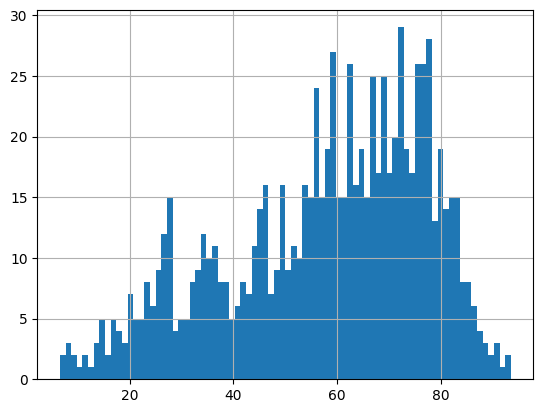

In [3]:
df['score'].hist(bins=80)

In [4]:
# looks good but lets just keep it between 0 and 1 to make training more stable
df['score'] = df['score'] / 100

In [5]:
df['len'] = df['transcript'].str.len()

<Axes: >

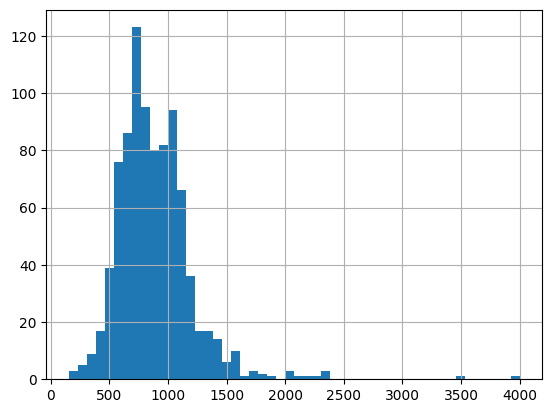

In [6]:
df['len'].hist(bins=50)

In [7]:
df.sort_values('len')

,name,episode,youtube_link,score,transcript,len
611,Brandon Farris,Min #22 — KT #707,https://youtu.be/qUmZG3yN_L4?t=8178,0.151,"I've been told I have resting Republican face. I look like I buy my daughter black baby dolls because it's February, Black History Month. It's not good.",152
139,Timmy No Brakes,Min #10 — KT #741,https://youtu.be/FAyfhUgUmAQ?t=6149,0.929,There is no chance of me writing or acquiring a transcript for this. Just know it was despicably funny and you should most definitely click the Youtube button on this card and go and watch this bit.,198
295,Dean from AIRCO,Min #3 — KT #731,https://youtu.be/3jAPUKKW5pE?t=1147,0.819,"Dean : My name is Dean. \n\nTony : Hell yeah. \n\nShane : Well hold on, hold on, Hold on. Let's see if he actually, did you fix it? \n\nDean I did. Yeah. \n\nTony : Oh Wow. Unbelievable. \n\nmin_t...",201
634,Dubz General,Min #23 — KT #707,https://youtu.be/qUmZG3yN_L4?t=8253,0.244,Sup white people? I'm new to dating. Are y'all still afraid of AIDS out here? I've been fucking these ratchet bitches lately and I was in with her and I was getting it in. I was trying to get it i...,236
872,Jared Nathan,Min #5 — KT #687,https://youtu.be/WqjzyGC8ti8?t=2723,0.792,"I was on Amazon, tttttttttttttoday. Look up electrictttttronics. I've found some explosive deals on ppppppppppaigers and cccellphones. They won't shhhhhhhhhip to Lllllllebanon. I was too scared to...",236
...,...,...,...,...,...,...
41,Dedrick Flynn,Min #7 — KT #749,https://youtu.be/n41jDuAwD_s&t?t=3887,0.587,"Man, this shit feel good man. I used to actually hate rich people before I got money. I did. You know, rich people got different debit cards in us. They got maybe y'all, some of y'all got 'em out ...",2323
450,Zeth Burton,Min #2 — KT #719,https://youtu.be/Ke2uMqOMn-U?t=816,0.402,"I'm proud of myself. I got a girlfriend now who's been there for eight months, and for the first time two days ago, I made that bitch cum. I'm proud of myself. Yeah. Yeah, nigga. Yeah, eight month...",2333
449,Kam Patterson,Min #6 — KT #719,https://youtu.be/Ke2uMqOMn-U?t=3901,0.657,"I'm proud of myself. I got a girlfriend now who's been there for eight months, and for the first time two days ago, I made that bitch cum. I'm proud of myself. Yeah. Yeah, nigga. Yeah, eight month...",2333
14,Dedrick Flynn,Min #6 — KT #751,https://youtu.be/tXW0SFv1C-U&t?t=2700,0.440,"Oh my God. What you know about being the only black dude at a country music festival in Kennesaw, Georgia called Shaky Boots Festival? Yeah. No, I only found that out 'cause when I walked into the...",3470


In [8]:
df = df.drop(139)  # not a real transcript

<Axes: xlabel='len', ylabel='score'>

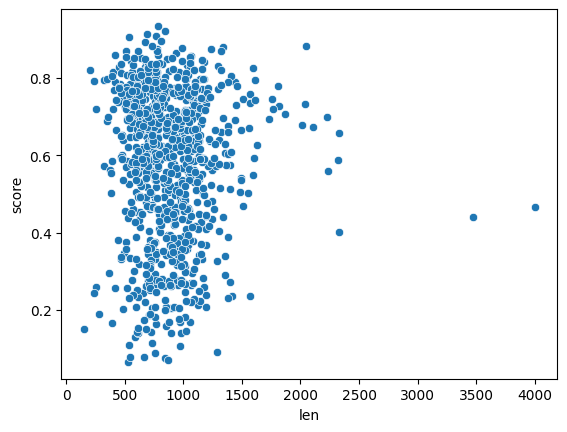

In [9]:
# there shouldnt be a correlation here
sns.scatterplot(data=df, x='len', y='score')

In [ ]:
df['name'].value_counts()
big_names = df['name'].value_counts().index[:15]
df['reoccuring_guest'] = df['name'].apply(lambda x: x if x in big_names else 'Nope')

name
William Montgomery    48
Ari Matti             36
Kam Patterson         30
Martin Phillips       15
Hans Kim              12
                      ..
Tyler Cole             1
Sam Adamo              1
Hector Garcia          1
Tommy P                1
Edgar Sandavol         1
Name: count, Length: 545, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Nope'),
  Text(1, 0, 'Fiona Cauley'),
  Text(2, 0, 'Timmy No Brakes'),
  Text(3, 0, 'Ari Matti'),
  Text(4, 0, 'Kam Patterson'),
  Text(5, 0, 'Dedrick Flynn'),
  Text(6, 0, 'William Montgomery'),
  Text(7, 0, 'Jack Shaw'),
  Text(8, 0, 'David Lucas'),
  Text(9, 0, 'Martin Phillips'),
  Text(10, 0, 'Kansei Yasuda'),
  Text(11, 0, 'Collin Sledge'),
  Text(12, 0, 'Uncle Lazer'),
  Text(13, 0, 'Hans Kim'),
  Text(14, 0, 'Drew Nickens'),
  Text(15, 0, 'David Jolly')])

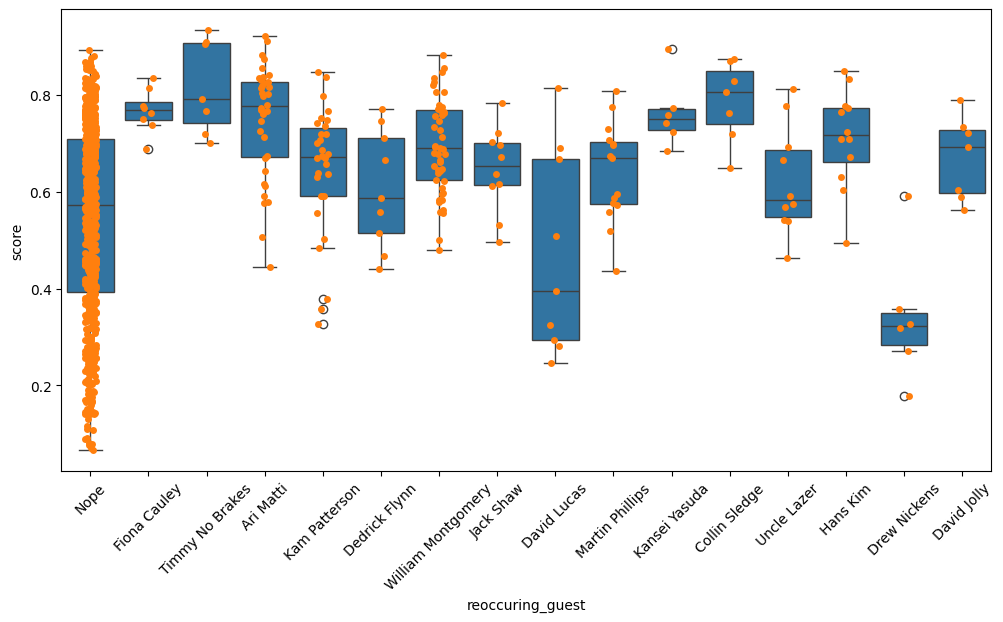

In [ ]:
# do reoccuring gusets get better scores?
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='reoccuring_guest', y='score')
sns.stripplot(data=df, x='reoccuring_guest', y='score')
plt.xticks(rotation=45)

<Axes: xlabel='None', ylabel='score'>

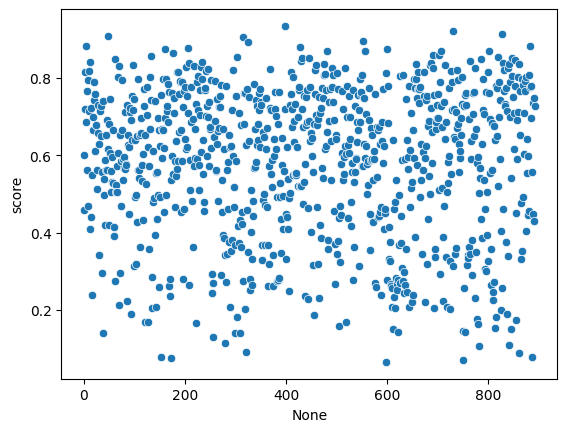

In [14]:
# Do scores vary over time?
sns.scatterplot(data=df, x=df.index, y='score')

In [15]:

train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)


<Axes: >

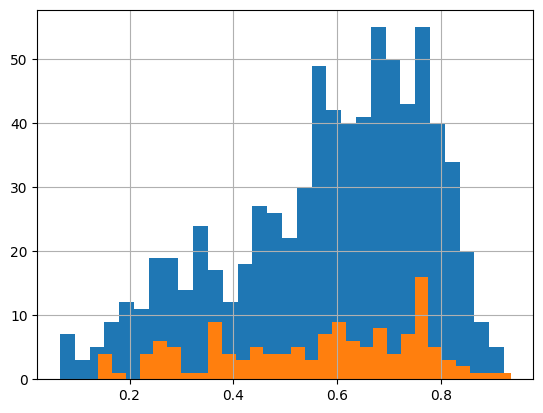

In [19]:
train_df['score'].hist(bins=30)
test_df['score'].hist(bins=30)

In [20]:
train_df.to_csv('JudgeTony_train_data.csv', index=False)
test_df.to_csv('JudgeTony_test_data.csv', index=False)